In [31]:
%load_ext autoreload
%autoreload 2
from production import ExactSolver, Wordline, Problem
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# $Z$ and $E$ computation

High temperature, small $\Delta\tau$ thus small error

In [61]:
temperatures = np.linspace(1, 100, 10)
Z_exacts = []
E_exacts = []
Z_approximates = []
E_approximates = []

for t in temperatures:
    p = Problem(
        n_sites=4,
        J_x=1.0,
        J_z=2.0,
        temperature=t,
        m=2,
    )
    exact_solver = ExactSolver(p)
    Z_exacts.append(np.trace(exact_solver.exp_H))
    E_exacts.append(exact_solver.energy)
    Z_approximate = 0.0
    E_approximate = 0.0
    for config in exact_solver.all_configs():
        w = Wordline(p, config)
        Z_approximate += w.weight
        if w.weight != 0.0:
            E_approximate += w.energy * w.weight
    Z_approximates.append(Z_approximate)
    E_approximates.append(E_approximate / Z_approximate)

Generating configs: 65536it [00:01, 59070.36it/s]         
Generating configs: 65536it [00:00, -421626.16it/s]       
Generating configs: 65536it [00:01, 61376.25it/s]         
Generating configs: 65536it [00:01, 59387.25it/s]         
Generating configs: 65536it [00:01, 56134.21it/s]         
Generating configs: 65536it [00:01, 58838.92it/s]         
Generating configs: 65536it [00:01, 60623.99it/s]         
Generating configs: 65536it [00:01, 60494.17it/s]         
Generating configs: 65536it [00:01, 60920.64it/s]         
Generating configs: 65536it [00:01, 61026.05it/s]         


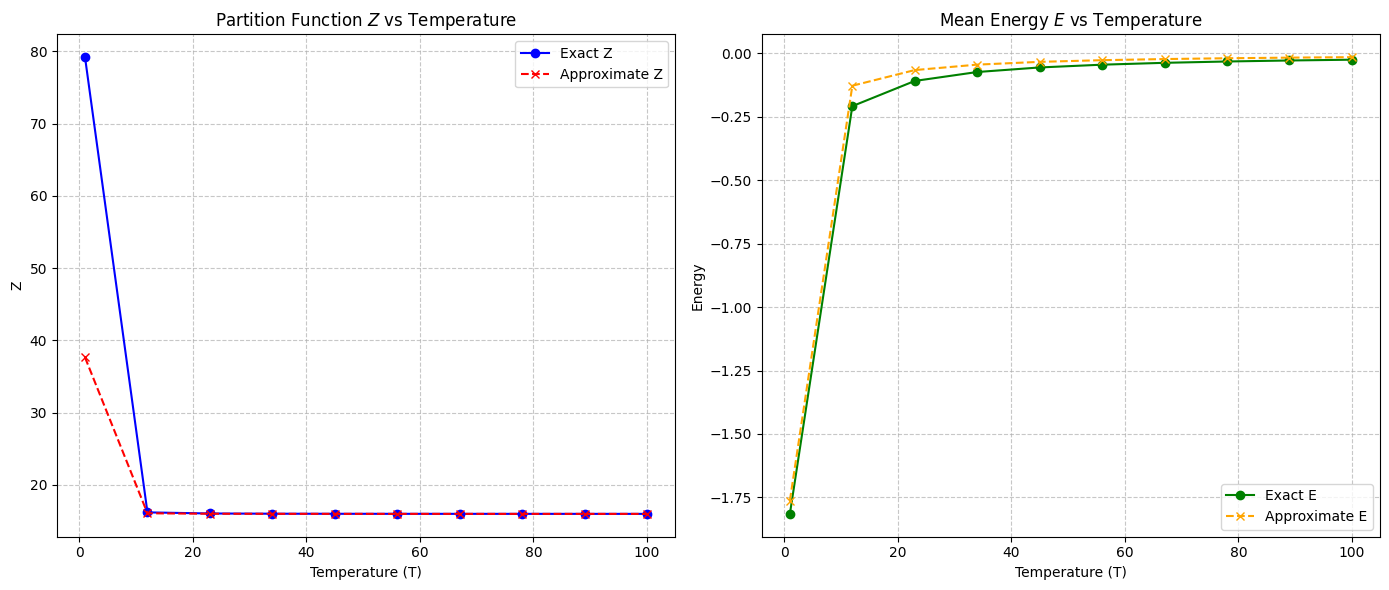

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# First Plot: Partition Function Z
ax1.plot(temperatures, Z_exacts, 'o-', label='Exact Z', color='blue')
ax1.plot(temperatures, Z_approximates, 'x--', label='Approximate Z', color='red')
ax1.set_title(r'Partition Function $Z$ vs Temperature')
ax1.set_xlabel('Temperature (T)')
ax1.set_ylabel('Z')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Second Plot: Energy E
ax2.plot(temperatures, E_exacts, 'o-', label='Exact E', color='green')
ax2.plot(temperatures, E_approximates, 'x--', label='Approximate E', color='orange')
ax2.set_title(r'Mean Energy $E$ vs Temperature')
ax2.set_xlabel('Temperature (T)')
ax2.set_ylabel('Energy')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [63]:
temperatures = np.linspace(1, 5, 10)
Z_exacts = []
E_exacts = []
Z_approximates = []
E_approximates = []

for t in temperatures:
    p = Problem(
        n_sites=4,
        J_x=1.0,
        J_z=2.0,
        temperature=t,
        m=2,
    )
    exact_solver = ExactSolver(p)
    Z_exacts.append(np.trace(exact_solver.exp_H))
    E_exacts.append(exact_solver.energy)
    Z_approximate = 0.0
    E_approximate = 0.0
    for config in exact_solver.all_configs():
        w = Wordline(p, config)
        Z_approximate += w.weight
        if w.weight != 0.0:
            E_approximate += w.energy * w.weight
    Z_approximates.append(Z_approximate)
    E_approximates.append(E_approximate / Z_approximate)

Generating configs: 1943it [00:00, 19425.48it/s]          

Generating configs: 65536it [00:01, 46108.76it/s]
Generating configs: 65536it [00:01, 59912.39it/s]         
Generating configs: 65536it [00:01, 59603.97it/s]         
Generating configs: 65536it [00:01, 59450.21it/s]         
Generating configs: 65536it [00:01, 61413.70it/s]         
Generating configs: 65536it [00:01, 59365.35it/s]         
Generating configs: 65536it [00:01, 61312.57it/s]         
Generating configs: 65536it [00:01, 59738.82it/s]         
Generating configs: 65536it [00:01, 61120.03it/s]         
Generating configs: 65536it [00:01, 52285.97it/s]         


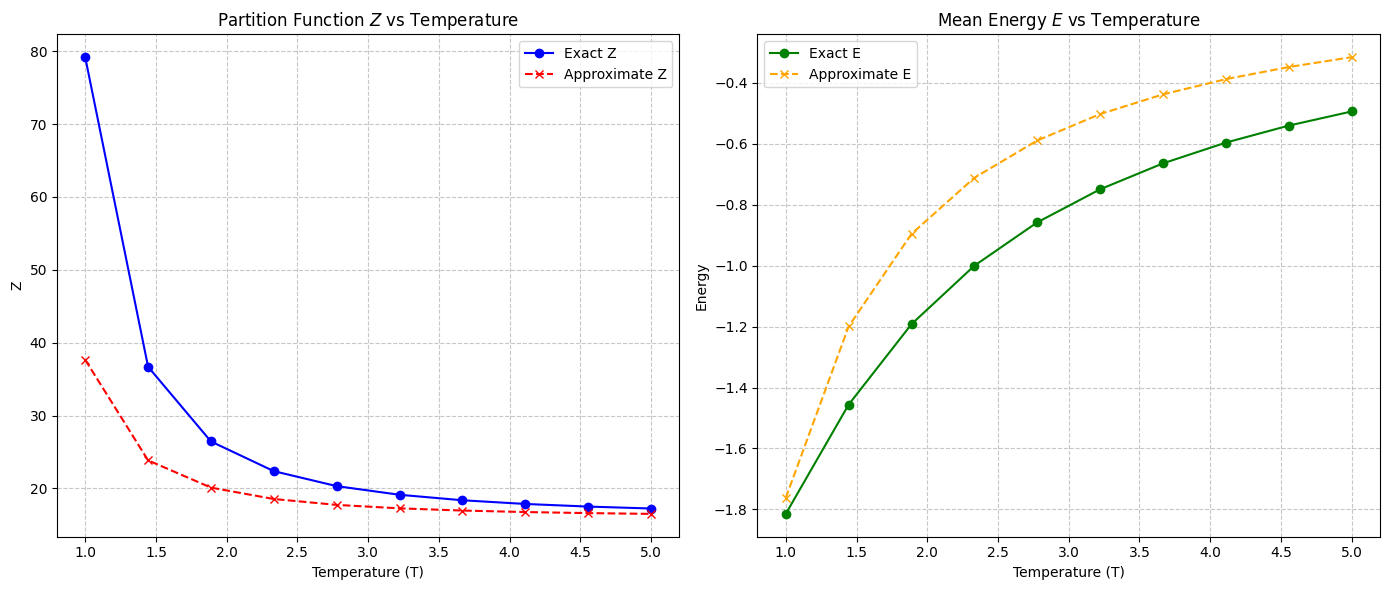

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# First Plot: Partition Function Z
ax1.plot(temperatures, Z_exacts, 'o-', label='Exact Z', color='blue')
ax1.plot(temperatures, Z_approximates, 'x--', label='Approximate Z', color='red')
ax1.set_title(r'Partition Function $Z$ vs Temperature')
ax1.set_xlabel('Temperature (T)')
ax1.set_ylabel('Z')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Second Plot: Energy E
ax2.plot(temperatures, E_exacts, 'o-', label='Exact E', color='green')
ax2.plot(temperatures, E_approximates, 'x--', label='Approximate E', color='orange')
ax2.set_title(r'Mean Energy $E$ vs Temperature')
ax2.set_xlabel('Temperature (T)')
ax2.set_ylabel('Energy')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [23]:
Z_approximated_p1 = 0.
E_approximated_p1 = 0.
for config in p1_exact_solver.all_configs():
    w = Wordline(p1, config)
    Z_approximated_p1 += w.weight
    if w.weight != 0.0:
        E_approximated_p1 += w.energy * w.weight
E_approximated_p1 /= Z_approximated_p1
print(f"Z_exact_p1={Z_exact_p1}, Z_approximated_p1={Z_approximated_p1}, relative error: {np.abs(Z_approximated_p1 - Z_exact_p1) / np.abs(Z_exact_p1)}%")
print(f"E_exact_p1={E_exact_p1}, E_approximated_p1={E_approximated_p1}, relative error: {np.abs(E_approximated_p1 - E_exact_p1) / np.abs(E_exact_p1)}%")

Generating configs: 608it [00:00, 6078.50it/s]            

Generating configs: 65536it [00:00, -80378.73it/s]

Z_exact_p1=(16.001240080532046-7.095739440970939e-21j), Z_approximated_p1=16.000496626359876, relative error: 4.646228469970639e-05%
E_exact_p1=(-0.005684285304190971+2.818625555738417e-22j), E_approximated_p1=-0.006833665813098613, relative error: 0.20220317021389028%


In [55]:
ms = [1,2,3]
Z_exacts = []
E_exacts = []
Z_approximates = []
E_approximates = []

for m in ms:
    p = Problem(
        n_sites=4,
        J_x=1.0,
        J_z=2.0,
        temperature=30.0,
        m=m,
    )
    exact_solver = ExactSolver(p)
    Z_exacts.append(np.trace(exact_solver.exp_H))
    E_exacts.append(exact_solver.energy)
    Z_approximate = 0.0
    E_approximate = 0.0
    for config in exact_solver.all_configs():
        w = Wordline(p, config)
        Z_approximate += w.weight
        if w.weight != 0.0:
            E_approximate += w.energy * w.weight
    Z_approximates.append(Z_approximate)
    E_approximates.append(E_approximate / Z_approximate)

Generating configs: 256it [00:00, 11511.32it/s]          
Generating configs: 65536it [00:01, 51487.69it/s]         
Generating configs: 16777216it [04:51, 57562.69it/s]      


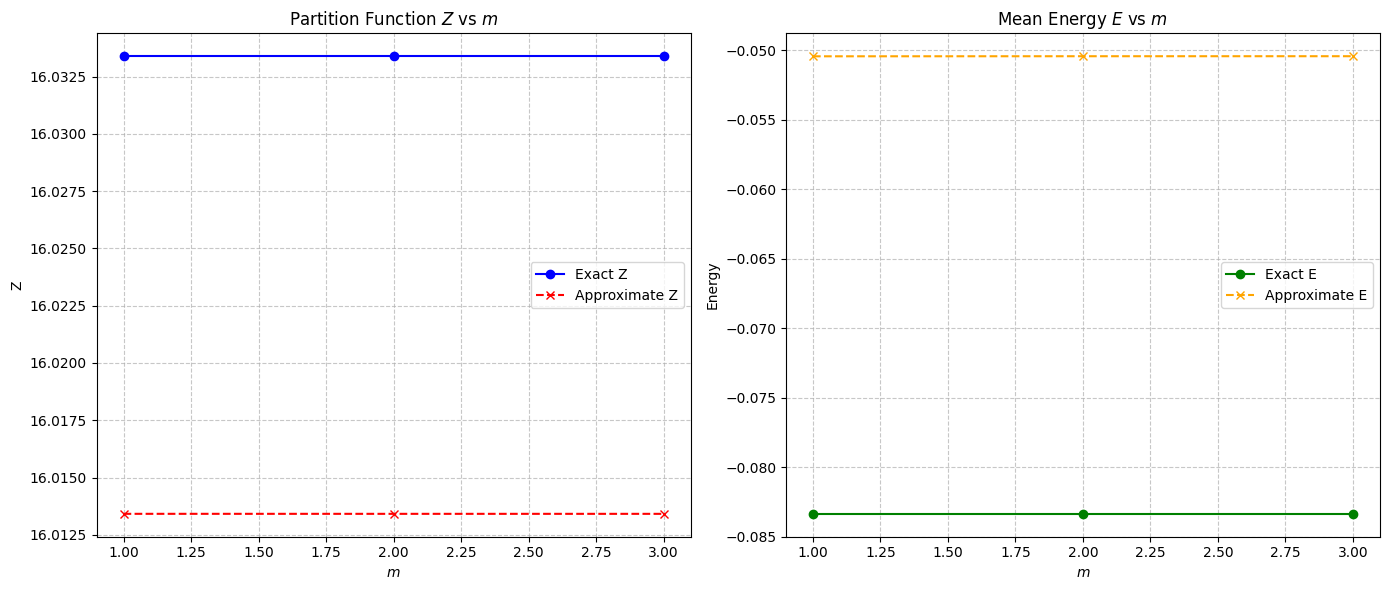

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# First Plot: Partition Function Z
ax1.plot(ms, Z_exacts, 'o-', label='Exact Z', color='blue')
ax1.plot(ms, Z_approximates, 'x--', label='Approximate Z', color='red')
ax1.set_title(r'Partition Function $Z$ vs $m$')
ax1.set_xlabel('$m$')
ax1.set_ylabel('Z')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Second Plot: Energy E
ax2.plot(ms, E_exacts, 'o-', label='Exact E', color='green')
ax2.plot(ms, E_approximates, 'x--', label='Approximate E', color='orange')
ax2.set_title(r'Mean Energy $E$ vs $m$')
ax2.set_xlabel('$m$')
ax2.set_ylabel('Energy')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Low temperature, higher $\Delta\tau$, bigger error

In [26]:
p2 = Problem(
    n_sites=4,
    J_x=1.0,
    J_z=1.0,
    temperature=1,
    m=2
)
p2.delta_tau

0.5

In [27]:
p2_exact_solver = ExactSolver(p2)
Z_exact_p2 = np.trace(p2_exact_solver.exp_H)
E_exact_p2 = p2_exact_solver.energy

In [28]:
Z_approximated_p2 = 0.
E_approximated_p2 = 0.
for config in p2_exact_solver.all_configs():
    w = Wordline(p2, config)
    Z_approximated_p2 += w.weight
    if w.weight != 0.0:
        E_approximated_p2 += w.energy * w.weight
E_approximated_p2 /= Z_approximated_p2
print(f"Z_exact_p2={Z_exact_p2}, Z_approximated_p2={Z_approximated_p2}, relative error: {np.abs(Z_approximated_p2 - Z_exact_p2) / np.abs(Z_exact_p2)}%")
print(f"E_exact_p2={E_exact_p2}, E_approximated_p2={E_approximated_p2}, relative error: {np.abs(E_approximated_p2 - E_exact_p2) / np.abs(E_exact_p2)}%")

Generating configs:   0%|          | 0/16 [00:00<?, ?it/s]

Generating configs: 65536it [00:01, 43485.43it/s]         

Z_exact_p2=(38.09101783413901-7.542281425244209e-17j), Z_approximated_p2=24.583728973876926, relative error: 0.35460561644945593%
E_exact_p2=(-0.5306945484354815-1.887292815561097e-19j), E_approximated_p2=-0.9014675456746867, relative error: 0.6986561258868509%
